# The Sparks Foundation:Graduate Rotational Internship Program

# Data science and Bussiness Analytics Intern

# TASK 1- Simple Linear Regression

# NAME - Vikash Jayprakash Chaturvedi

# Prediciting the percentage of student based on number of study hours

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore') 

In [58]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [59]:
df.shape #here we can see 25 rows and 2 column

(25, 2)

In [60]:
df.info() # here we get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [61]:
df.isna().sum() #no null value is present in df dataset

Hours     0
Scores    0
dtype: int64

In [62]:
df.describe() #statical informataion about the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


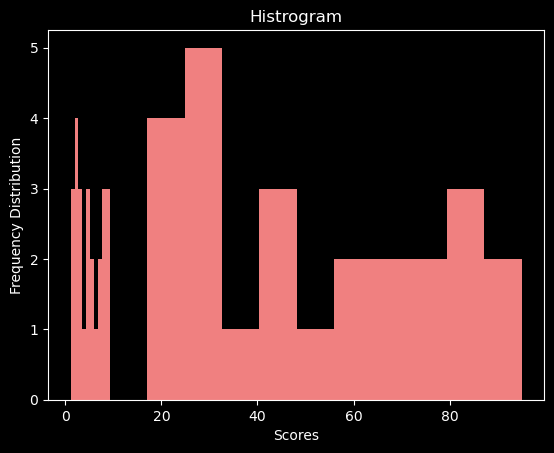

In [63]:
#plotting the histogram here we can observe the frequency distribution for each variable independently.
style.use('dark_background')
for col in df.columns:
    plt.hist(df[col],color='lightcoral')
    plt.xlabel(col)
    plt.ylabel("Frequency Distribution")
    plt.title("Histrogram")

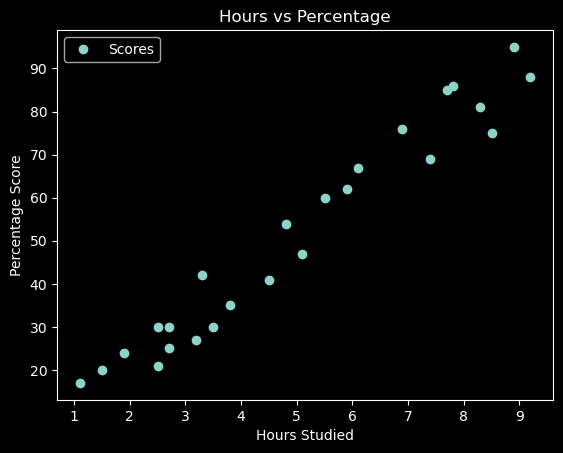

In [64]:
# Plotting the distribution of scores
#below graph showing the relationship between the 'Hours' and 'Scores' columns.
#From the below graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [65]:
#calculated the correlation between the 'Hours' and 'Scores' columns in the DataFrame df
#correlation coefficient between 'Hours' and 'Scores' is approximately 0.976, indicating a very strong positive correlation between the number of hours studied and the percentage scores obtained.
# correlation coefficient close to 1 suggests that as the number of hours studied increases, the percentage score tends to increase as well.
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

In [66]:
X = s_data.iloc[:, :-1].values  # x is independend variable
y = s_data.iloc[:, 1].values    # y is dependend variable

In [67]:
# x  represent the feature(s) ('Hours')
# y  represent the target variable ('Scores') 
#Here 70% of the data will be used for training, and the remaining 30% will be used for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)


In [68]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")


Training complete.


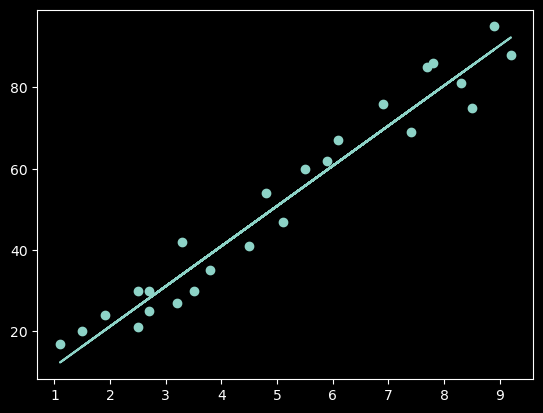

In [69]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
#In below plot we seen that maximum data points closed to the line. It means model fitting is good
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [70]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8


In [71]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,25,28.148771
1,35,39.007657
2,42,34.071800
3,62,59.738257
4,20,16.302714
5,69,74.545829
6,76,69.609972
7,54,48.879371


In [ ]:
# You can also test with your own data
# Below we can see predicted score is 92.80 if a student studies for 9.25 hrs/ day.
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# Evaluating the model

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.762517892332275
